In [9]:
#https://opendatascience.com/how-the-multinomial-logistic-regression-model-works/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from scipy.optimize import minimize
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD


Using TensorFlow backend.


['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


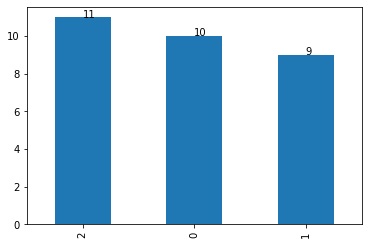

In [3]:
iris=load_iris()
print(iris.target_names)
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)

df = df.dropna()
print(df.head())

features = df.columns[:4]
X=df[features]
y=pd.factorize(df['species'])[0]
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lr=LogisticRegression(C=100)

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

setosa=y_pred[y_pred==2]
versicolor=y_pred[y_pred==0] 
virginica=y_pred[y_pred==1]

buffer=pd.Series(y_pred)
buffer.value_counts().plot(kind='bar')
plt.annotate(str(len(setosa)), xy=(0,len(setosa)))
plt.annotate(str(len(versicolor)), xy=(1,len(versicolor)))
plt.annotate(str(len(virginica)), xy=(2,len(virginica)))
plt.show()




In [4]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(0.5, 257.44, 'Predicted label')

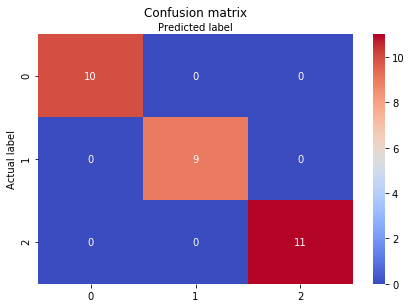

In [5]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [6]:
print("Accuracy is %s",lr.score(X_test,y_test)*100)

Accuracy is %s 100.0


In [7]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  1.0


In [14]:
predictors=iris.data
#print(type(iris.data))
target=to_categorical(iris.target)

n_cols=predictors.shape[1]
print(n_cols)

early_stopping_monitor=EarlyStopping(patience=3)

model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

myOptimizer=SGD(0.1)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=myOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target,callbacks=[early_stopping_monitor],  nb_epoch=100)

4


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
150/150 [==============================] - 0s 791us/step - loss: 1.2329 - accuracy: 0.3267
Epoch 2/100
150/150 [==============================] - 0s 60us/step - loss: 0.7230 - accuracy: 0.7467
Epoch 3/100
150/150 [==============================] - 0s 86us/step - loss: 0.7862 - accuracy: 0.6000
Epoch 4/100
150/150 [==============================] - 0s 80us/step - loss: 0.5922 - accuracy: 0.6800
Epoch 5/100
150/150 [==============================] - 0s 80us/step - loss: 0.4769 - accuracy: 0.7133
Epoch 6/100
150/150 [==============================] - 0s 80us/step - loss: 0.5764 - accuracy: 0.6667
Epoch 7/100
150/150 [==============================] - 0s 67us/step - loss: 0.4096 - accuracy: 0.8200
Epoch 8/100
150/150 [==============================] - 0s 73us/step - loss: 0.8441 - accuracy: 0.5133
Epoch 9/100
150/150 [==============================] - 0s 53us/step - loss: 0.3904 - accuracy: 0.8733
Epoch 10/100
150/150 [==============================] - 0s 53us/step - loss: 0.34

150/150 [==============================] - 0s 47us/step - loss: 0.0971 - accuracy: 0.9867
Epoch 81/100
150/150 [==============================] - 0s 47us/step - loss: 0.1905 - accuracy: 0.9000
Epoch 82/100
150/150 [==============================] - 0s 60us/step - loss: 0.1861 - accuracy: 0.9267
Epoch 83/100
150/150 [==============================] - 0s 47us/step - loss: 0.2135 - accuracy: 0.9133
Epoch 84/100
150/150 [==============================] - 0s 60us/step - loss: 0.1011 - accuracy: 0.9667
Epoch 85/100
150/150 [==============================] - 0s 53us/step - loss: 0.0925 - accuracy: 0.9667
Epoch 86/100
150/150 [==============================] - 0s 53us/step - loss: 0.4073 - accuracy: 0.8533
Epoch 87/100
150/150 [==============================] - 0s 53us/step - loss: 0.1383 - accuracy: 0.9800
Epoch 88/100
150/150 [==============================] - 0s 53us/step - loss: 0.0991 - accuracy: 0.9733
Epoch 89/100
150/150 [==============================] - 0s 66us/step - loss: 0.1673 - 

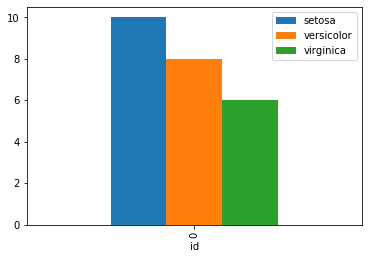

In [66]:
y_pred=model.predict(X_test)

#print(y_pred)
setosa=np.array([y_pred[i][0] for i in range(len(y_pred))])
versicolor=np.array([y_pred[i][1] for i in range(len(y_pred))])
virginica=np.array([y_pred[i][2] for i in range(len(y_pred))])

#print(setosa)

#buffer=pd.Series(y_pred)
df2=pd.DataFrame({'setosa': [len(setosa[setosa>.95])],'versicolor': [len(versicolor[versicolor>.95])], 'virginica': [len(virginica[virginica>.95])] })
df2['id']=np.arange(0,1)
df2=df2.set_index('id')
df2.plot.bar()
plt.show()